<a href="https://colab.research.google.com/github/joyw93/AI_Project/blob/main/AI_06_%EC%A1%B0%EC%9A%A9%EC%9B%90_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
!pip install --upgrade plotly
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc("font", family='NanumBarunGothic')
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('axes', unicode_minus=False)

In [ ]:
df=pd.read_csv('https://blog.kakaocdn.net/dn/rgf8Y/btraNIV6A8o/5pgAVTynt2KoX1Ty9pkzAk/vgames2.csv?attach=1&knm=tfile.csv')
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# 불필요한 열 제거
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Publisher',axis=1)
df

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03


In [ ]:
df['NA_Sales'].value_counts()

0        4443
0.02      537
0.01      536
0.03      528
0.05      523
         ... 
9.54        1
0.25M       1
1.13M       1
470K        1
3.83        1
Name: NA_Sales, Length: 494, dtype: int64

In [ ]:
# 데이터의 기본단위가 M(mega)인것을 확인. 단위를 맞춰준다.
region=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for sale in region:
  
  df[sale]=df[sale].replace({"K":"/1e3", "M":"*1"}, regex=True).map(pd.eval)


In [ ]:
df['NA_Sales'].value_counts()

0.00    4499
0.02     550
0.01     541
0.03     533
0.05     530
        ... 
4.89       1
9.67       1
4.75       1
2.35       1
2.95       1
Name: NA_Sales, Length: 409, dtype: int64

In [ ]:
# 중복데이터 확인 및 제거
display(df[df.duplicated()])
df.drop_duplicates(inplace = True)

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,0.0,0.0,0.02,0.0


In [ ]:
#중복데이터가 없어진것을 확인
display(df[df.duplicated()])

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
# Global_Sales (모든 지역 출고량의 총합) 열을 만들어준다.
df['Global_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03,0.38


In [ ]:
df['Year'].value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
13.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [ ]:
# 연도 단위 통일
def plus(x):
  if x>21 and x<1000:
    x+=1900
  elif x<=21:
    x+=2000
  return x

df['Year']=df['Year'].apply(plus)
df['Year']

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16597, dtype: float64

In [ ]:
df.isnull().sum()

Name              0
Platform          0
Year            270
Genre            50
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# 결측치 제거
df = df.dropna(axis=0)

In [ ]:
df['Year']=df['Year'].astype(int)

In [ ]:
# 결측치 비율
320/16597*100

1.9280592878231004

In [ ]:
df

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38


# 지역에 따라서 선호하는 게임 장르가 다를까

### -지역에 따른 장르별 출고량

In [ ]:
df1=copy.copy(df)
df1=df1[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [ ]:
na=region_genre(df1,'NA_Sales')
eu=region_genre(df1,'EU_Sales')
jp=region_genre(df1,'JP_Sales')
ot=region_genre(df1,'Other_Sales')
dff1=pd.merge(na,eu)
dff2=pd.merge(jp,ot)
dff=pd.merge(dff1,dff2)

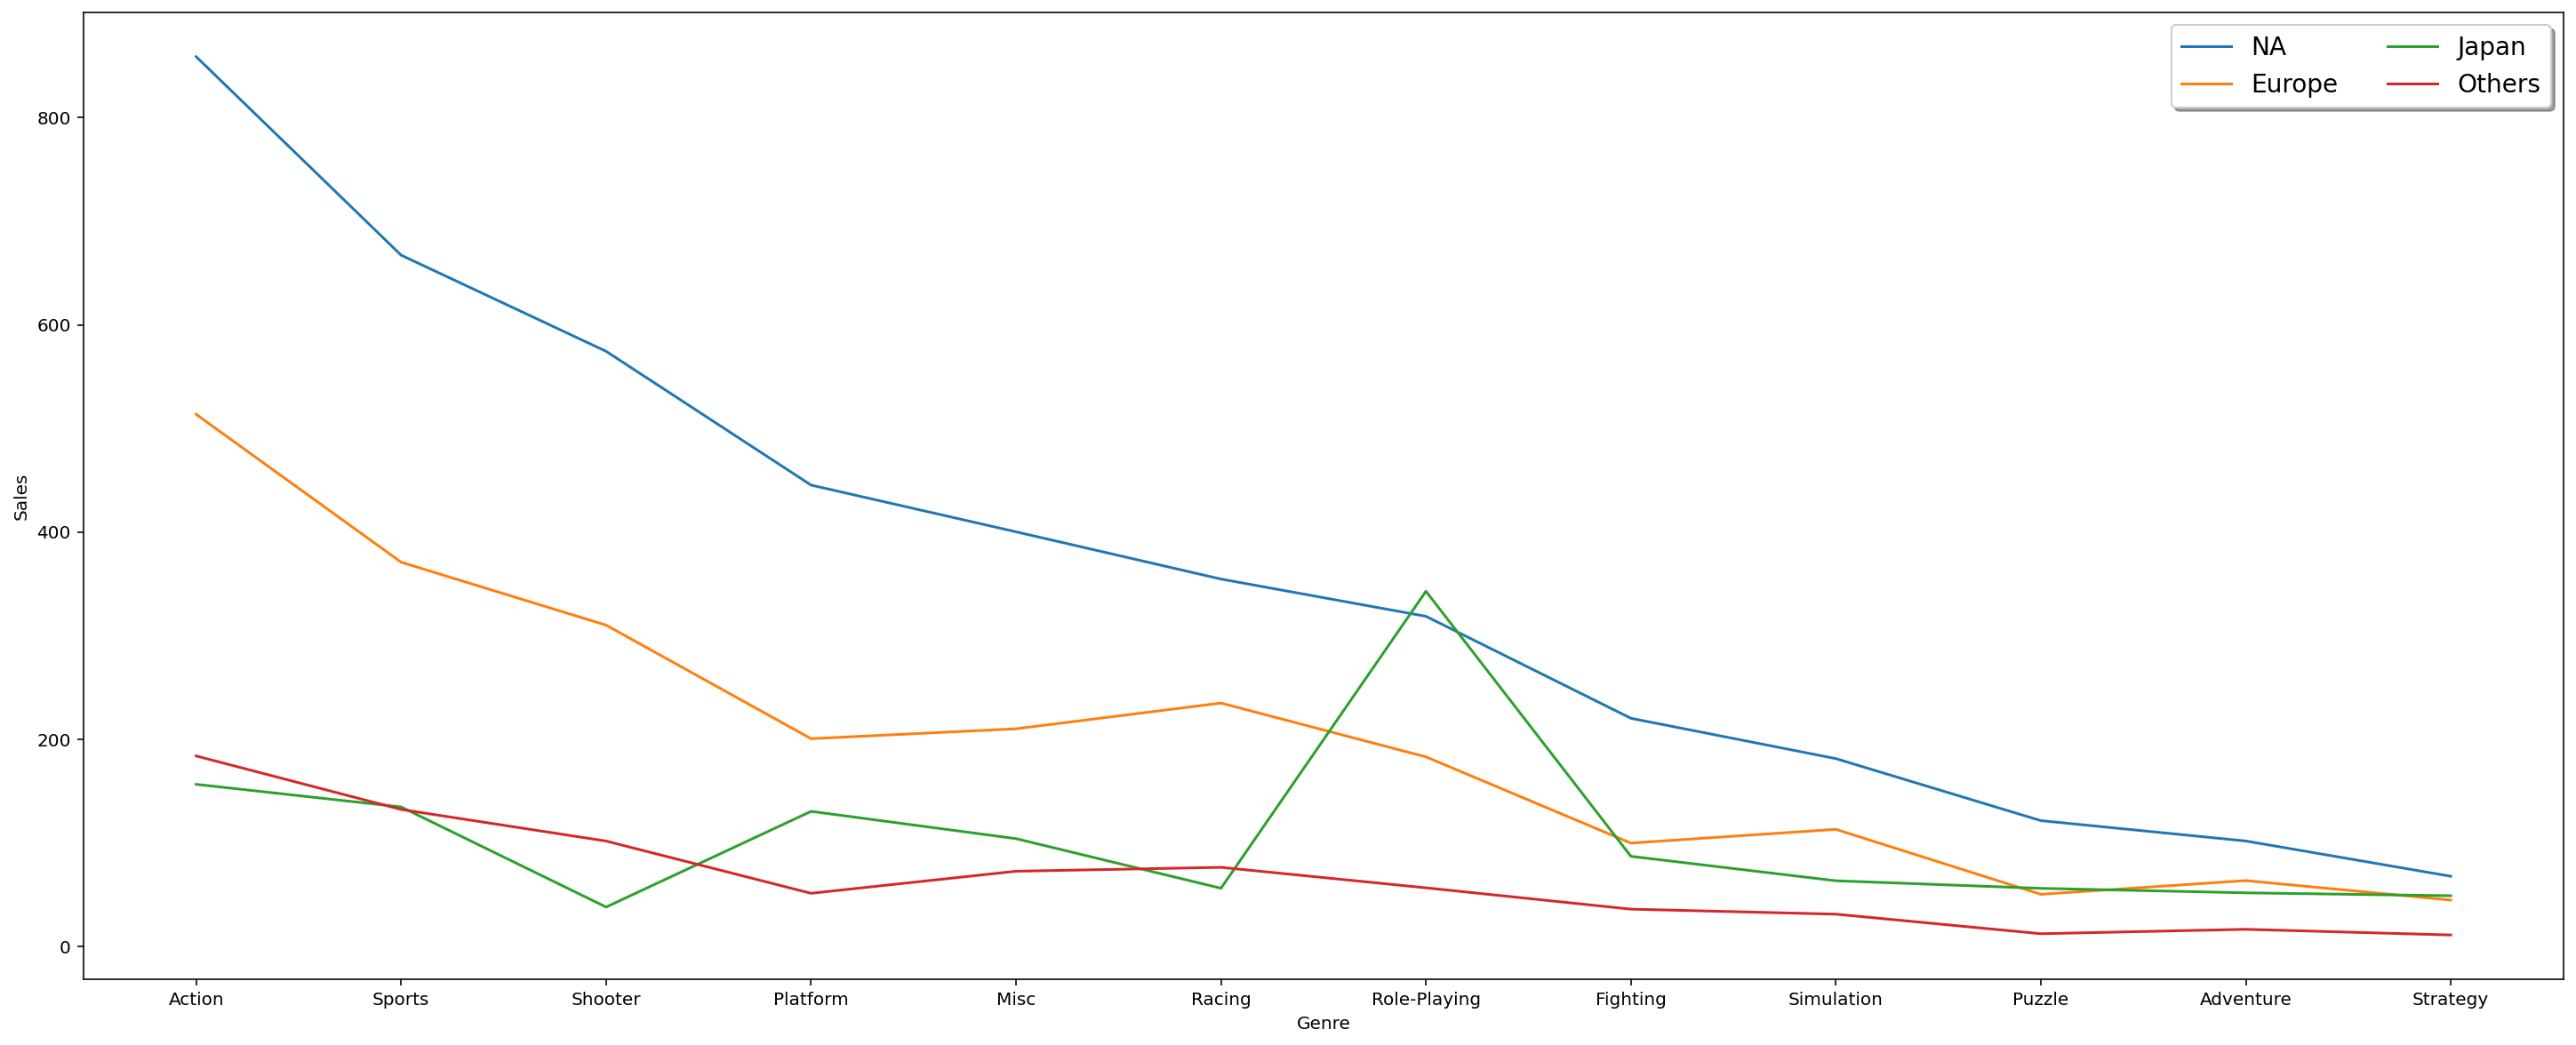

In [ ]:
plt.figure(figsize=(25,10))
plt.ylabel('Sales')
sns.lineplot(x=dff['Genre'],y=dff['NA_Sales'],label='NA')
sns.lineplot(x=dff['Genre'],y=dff['EU_Sales'],label='Europe')
sns.lineplot(x=dff['Genre'],y=dff['JP_Sales'],label='Japan')
sns.lineplot(x=dff['Genre'],y=dff['Other_Sales'],label='Others')
plt.legend(loc='best', ncol=2, fontsize=14, frameon=True, shadow=True)
plt.show()

In [ ]:
def region_genre(df,region):
   df_=df[[region,'Genre']]
   df_=pd.DataFrame(df[region].groupby(df['Genre']).sum())
   df_=df_.sort_values(by=region,ascending=False)
   df_=df_.reset_index()
   return df_

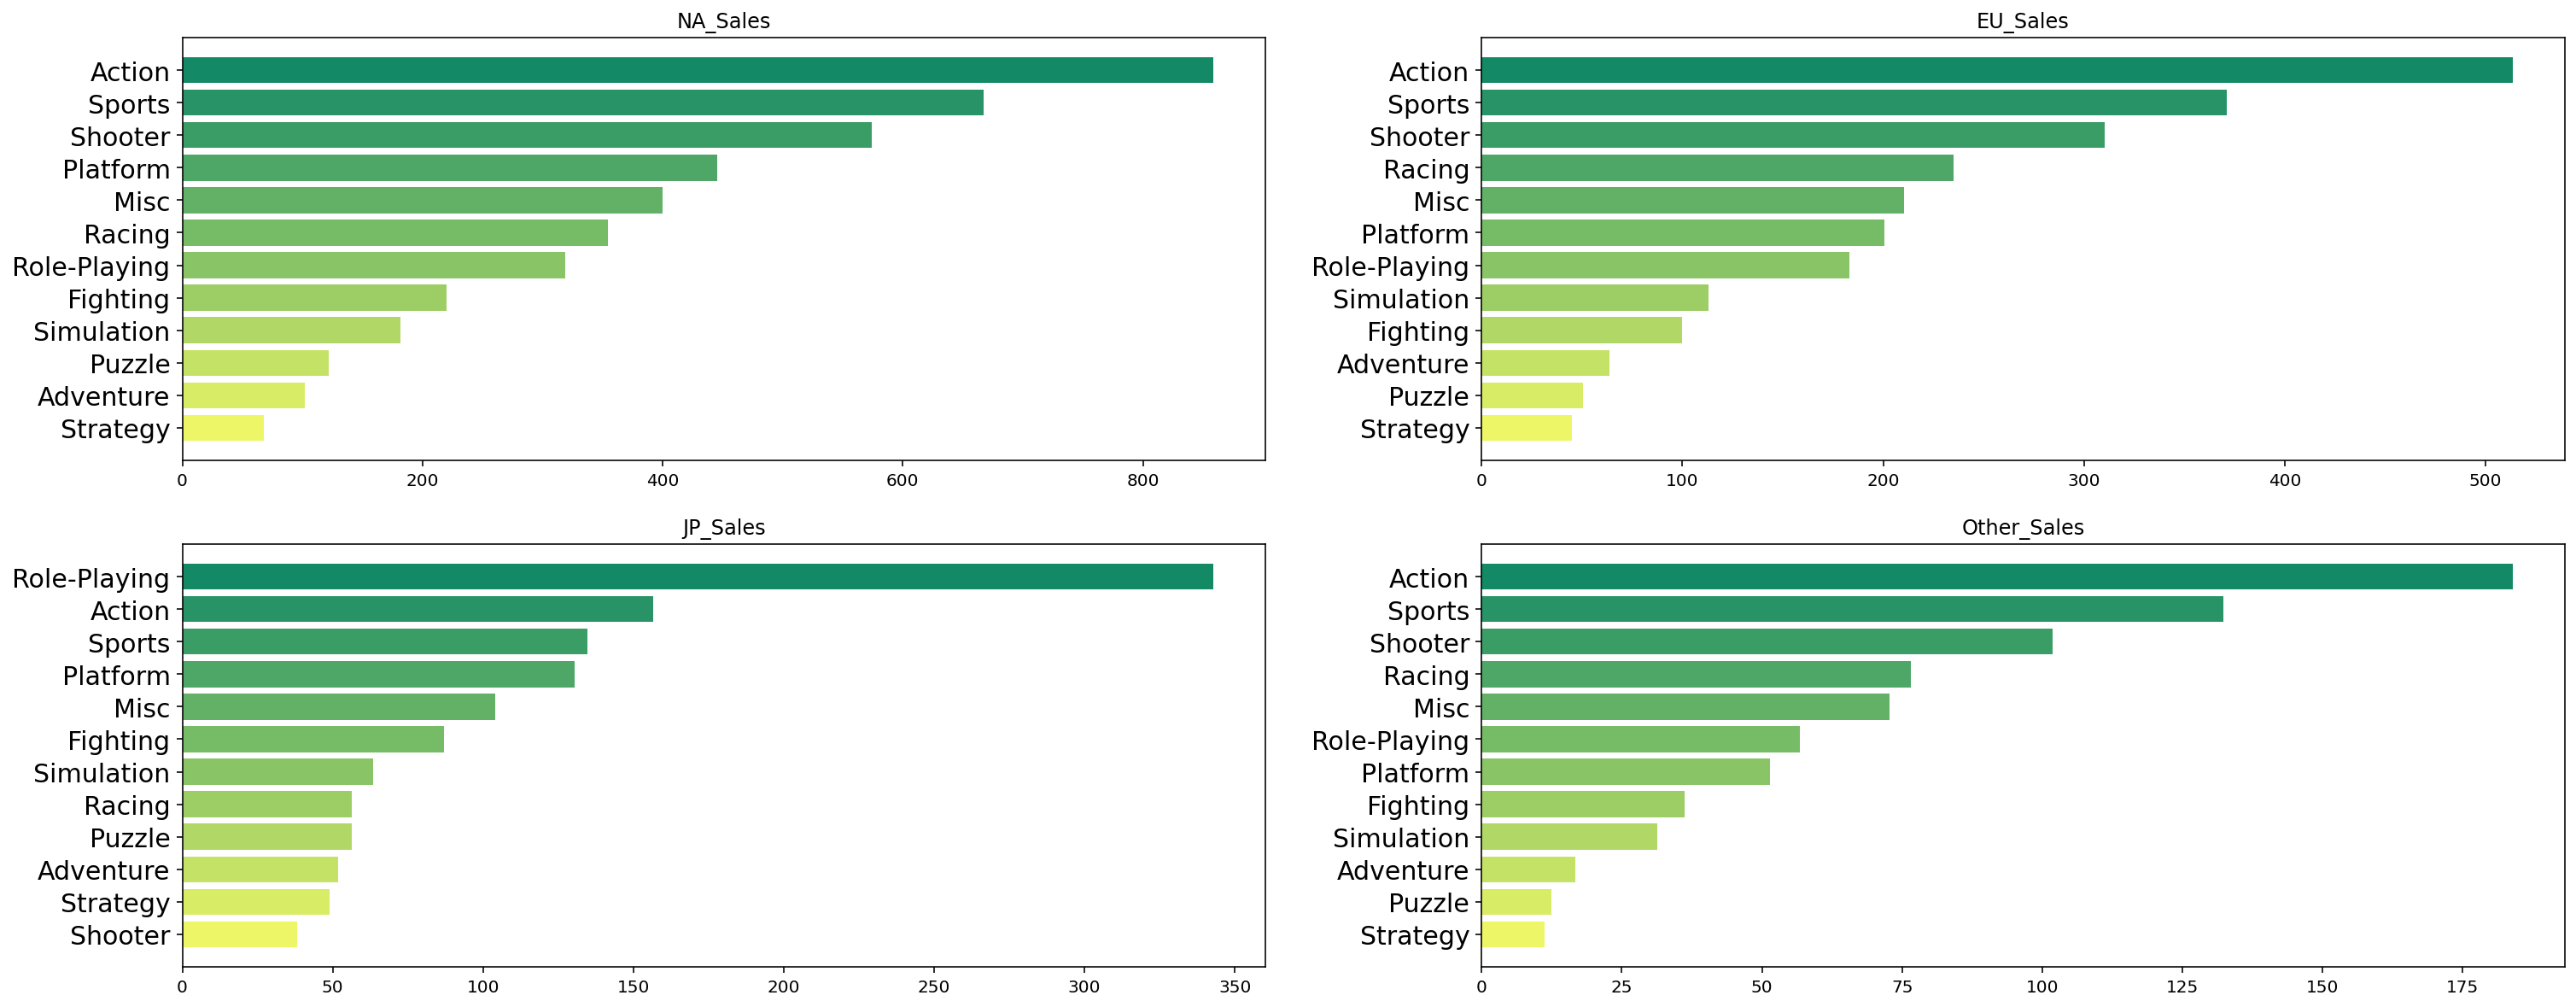

In [ ]:
i=1
plt.figure(figsize=(25,10))
colors = sns.color_palette('summer',12)
colors=colors[::-1]
for reg in region:
  data=region_genre(df1,reg)
  data=data[::-1]
  plt.subplot(2,2,i)
  plt.yticks(fontsize=15)
  plt.title(reg)
  plt.grid(False)
  plt.barh(data['Genre'],data[reg],color=colors)
  i=i+1
  

In [ ]:
na=region_genre(df1,'NA_Sales')
eu=region_genre(df1,'EU_Sales')
jp=region_genre(df1,'JP_Sales')
ot=region_genre(df1,'Other_Sales')
dff1=pd.merge(na,eu)
dff2=pd.merge(jp,ot)
dff=pd.merge(dff1,dff2)

In [ ]:
dff['Global_Sales']=dff['NA_Sales']+dff['EU_Sales']+dff['JP_Sales']+dff['Other_Sales']
dff=dff.sort_values(by='Global_Sales',ascending=True)

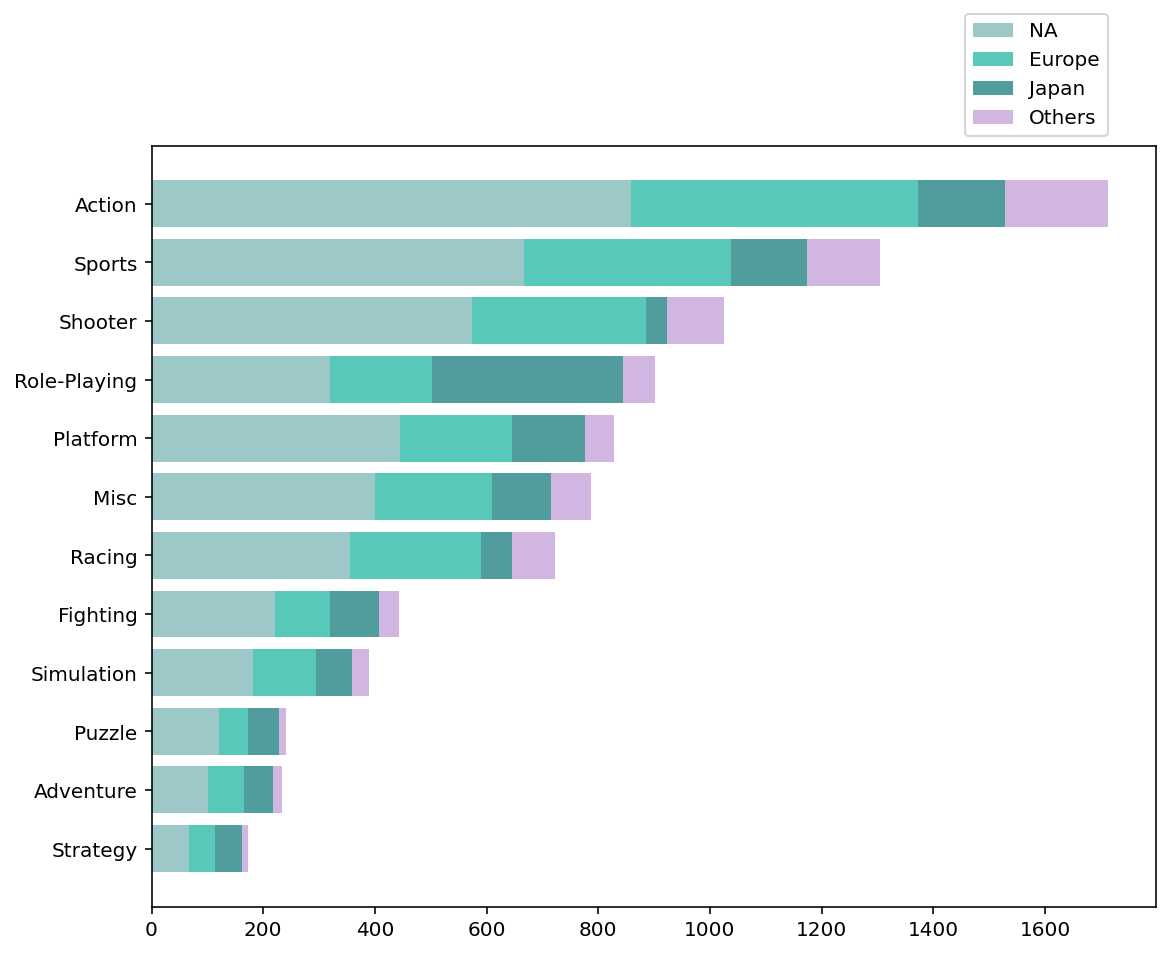

In [ ]:
plt.figure(figsize=(9,7))
plt.barh(dff['Genre'],dff['NA_Sales'],color="#9DC8C8",label="NA")
plt.barh(dff['Genre'],dff['EU_Sales'],color="#58C9B9",left=np.array(dff['NA_Sales']),label="Europe")
plt.barh(dff['Genre'],dff['JP_Sales'],color="#519D9E",left=np.array(dff['NA_Sales'])+np.array(dff['EU_Sales']),label="Japan")
plt.barh(dff['Genre'],dff['Other_Sales'],color="#D1B6E1",left=np.array(dff['NA_Sales'])+np.array(dff['EU_Sales'])+np.array(dff['JP_Sales']),label="Others")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [ ]:
na=region_genre(df1,'NA_Sales')
na['NA_Sales']=na['NA_Sales']/na['NA_Sales'].sum()
eu=region_genre(df1,'EU_Sales')
eu['EU_Sales']=eu['EU_Sales']/eu['EU_Sales'].sum()
jp=region_genre(df1,'JP_Sales')
jp['JP_Sales']=jp['JP_Sales']/jp['JP_Sales'].sum()
ot=region_genre(df1,'Other_Sales')
ot['Other_Sales']=ot['Other_Sales']/ot['Other_Sales'].sum()
dff1=pd.merge(na,eu)
dff2=pd.merge(jp,ot)
dff=pd.merge(dff1,dff2)

In [ ]:
genre=pd.DataFrame(dff['Genre'])
dff=dff.drop(['Genre'],axis=1)


In [ ]:
for i in range(12):
  dff.iloc[i,:]=dff.iloc[i,:]*(100/dff.iloc[i,:].sum())


In [ ]:
dff=pd.concat([genre,dff],axis=1)
dff=dff.set_index('Genre')
dff=dff.reset_index()

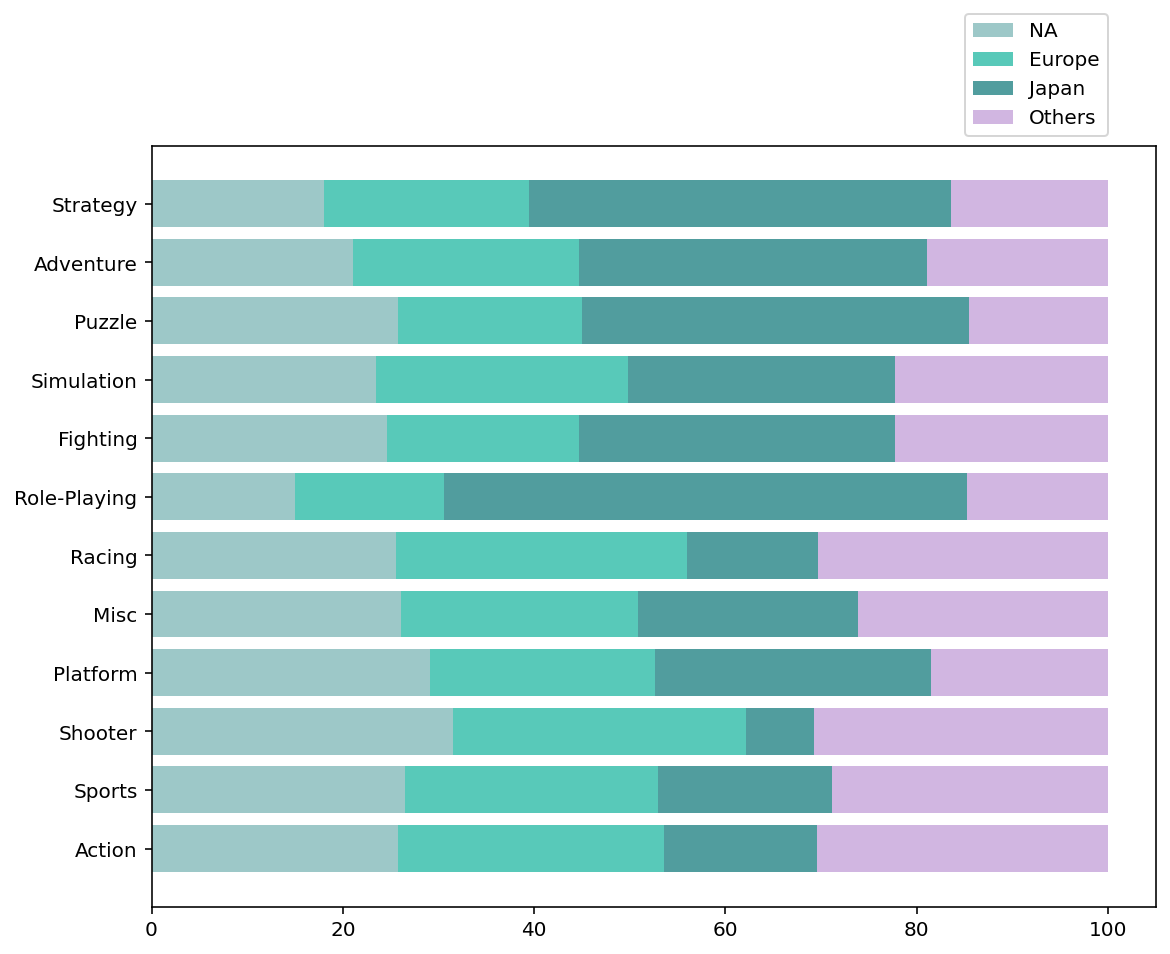

In [ ]:
plt.figure(figsize=(9,7))
plt.barh(dff['Genre'],dff['NA_Sales'],color="#9DC8C8",label="NA")
plt.barh(dff['Genre'],dff['EU_Sales'],color="#58C9B9",left=np.array(dff['NA_Sales']),label="Europe")
plt.barh(dff['Genre'],dff['JP_Sales'],color="#519D9E",left=np.array(dff['NA_Sales'])+np.array(dff['EU_Sales']),label="Japan")
plt.barh(dff['Genre'],dff['Other_Sales'],color="#D1B6E1",left=np.array(dff['NA_Sales'])+np.array(dff['EU_Sales'])+np.array(dff['JP_Sales']),label="Others")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

다음 시각화 자료를 통해 각 변수간의 상관계수 (correlation) 을 확인할 수 있다.

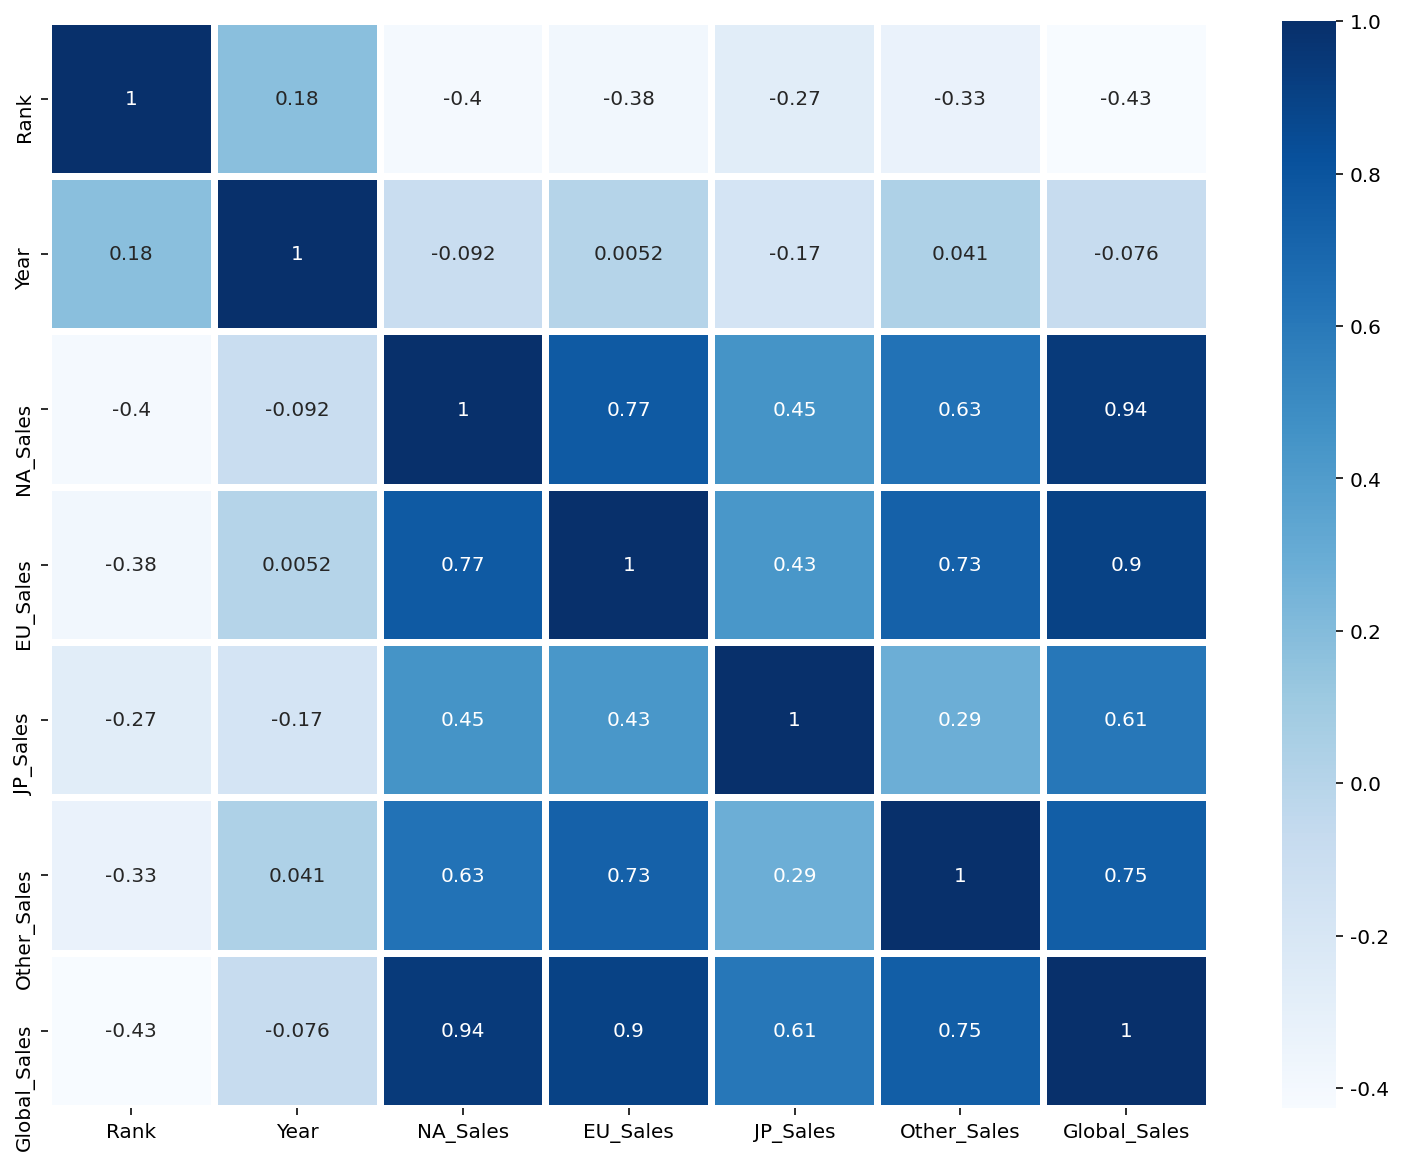

In [ ]:
dfc=copy.copy(df)
dfc=dfc.sort_values(by='Global_Sales',ascending=False)
dfc=dfc.reset_index().drop('index',axis=1)
dfc=dfc.reset_index()
dfc.rename(columns={'index':'Rank'}, inplace=True)
plt.figure(figsize=(13,10))
sns.heatmap(dfc.corr(), cmap = "Blues", annot=True, linewidth=3)
plt.show()

* **북미와 유럽의 상관계수 (0.77)**
* 일본과 북미의 상관계수 (0.45)   
* 일본과 유럽의 상관계수 (0.43)
* **북미와 전체시장의 상관계수 (0.94)**
* **유럽과 전체시장의 상관계수 (0.90)**

### -지역별 점유율


In [ ]:
df1=copy.copy(df)

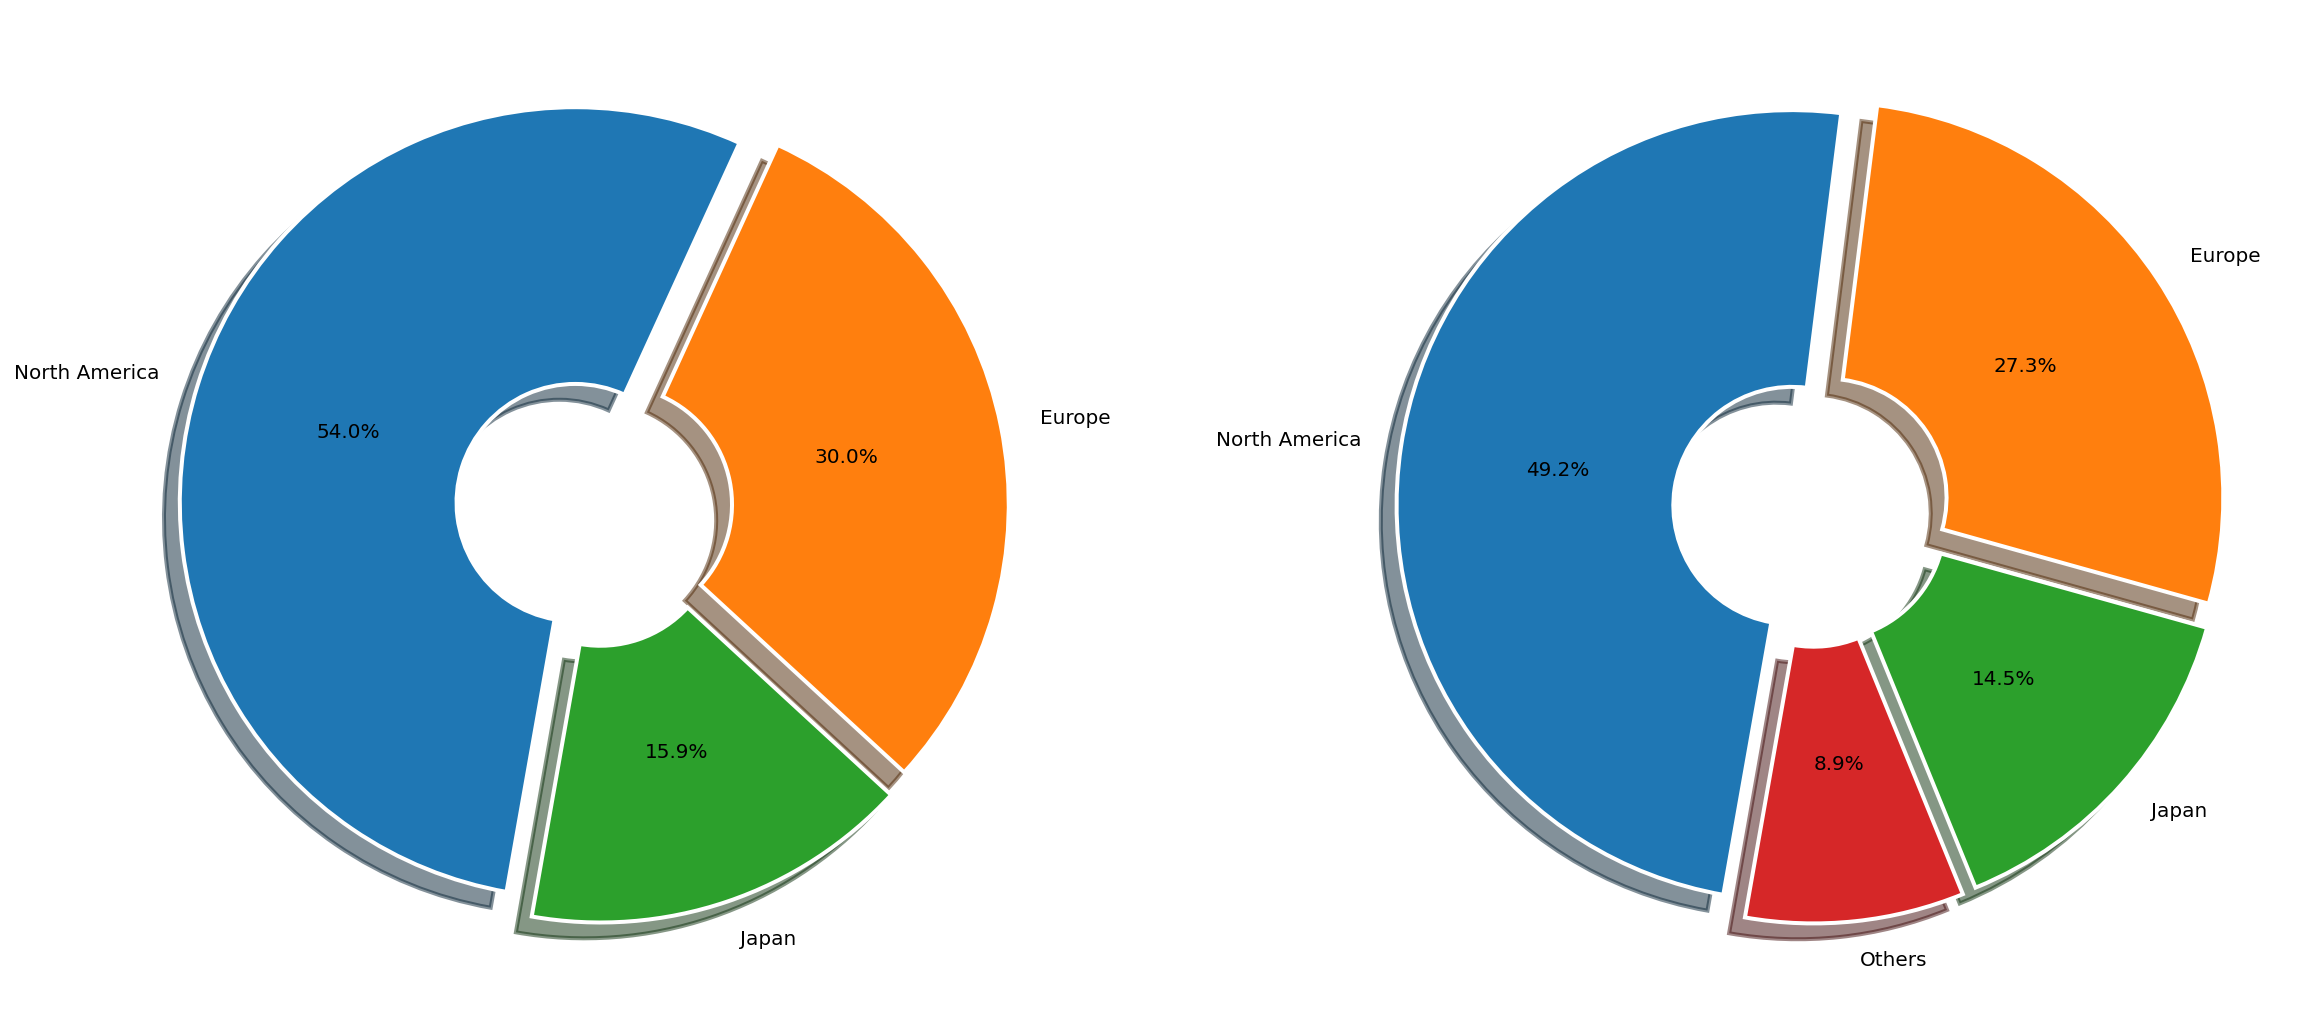

In [ ]:
na=df1['NA_Sales'].sum()
eu=df1['EU_Sales'].sum()
jp=df1['JP_Sales'].sum()
ot=df1['Other_Sales'].sum()
ratio1=[na,eu,jp]
ratio2=[na,eu,jp,ot]

explode1 = [0.05, 0.05, 0.05]
explode2 = [0.05, 0.05, 0.05, 0.05]

label1 =['North America','Europe','Japan']
label2 =['North America','Europe','Japan','Others']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.pie(ratio1, labels=label1, autopct='%.1f%%', startangle=260, counterclock=False,explode=explode1,shadow=True,wedgeprops=wedgeprops)
plt.subplot(2,2,2)
plt.pie(ratio2, labels=label2, autopct='%.1f%%', startangle=260, counterclock=False,explode=explode2,shadow=True,wedgeprops=wedgeprops)
plt.show()

# 연도별 게임의 트렌드가 있을까



### -연도에 따른 장르별 출고량 그래프


In [ ]:
df2=df[['Year','Genre','Global_Sales']]

In [ ]:
df2=df2.sort_values('Year')

In [ ]:
df2_=df2[['Year','Global_Sales']]
df2_=df2_.groupby(by='Year').sum().sort_values(by='Year',ascending=True).reset_index()

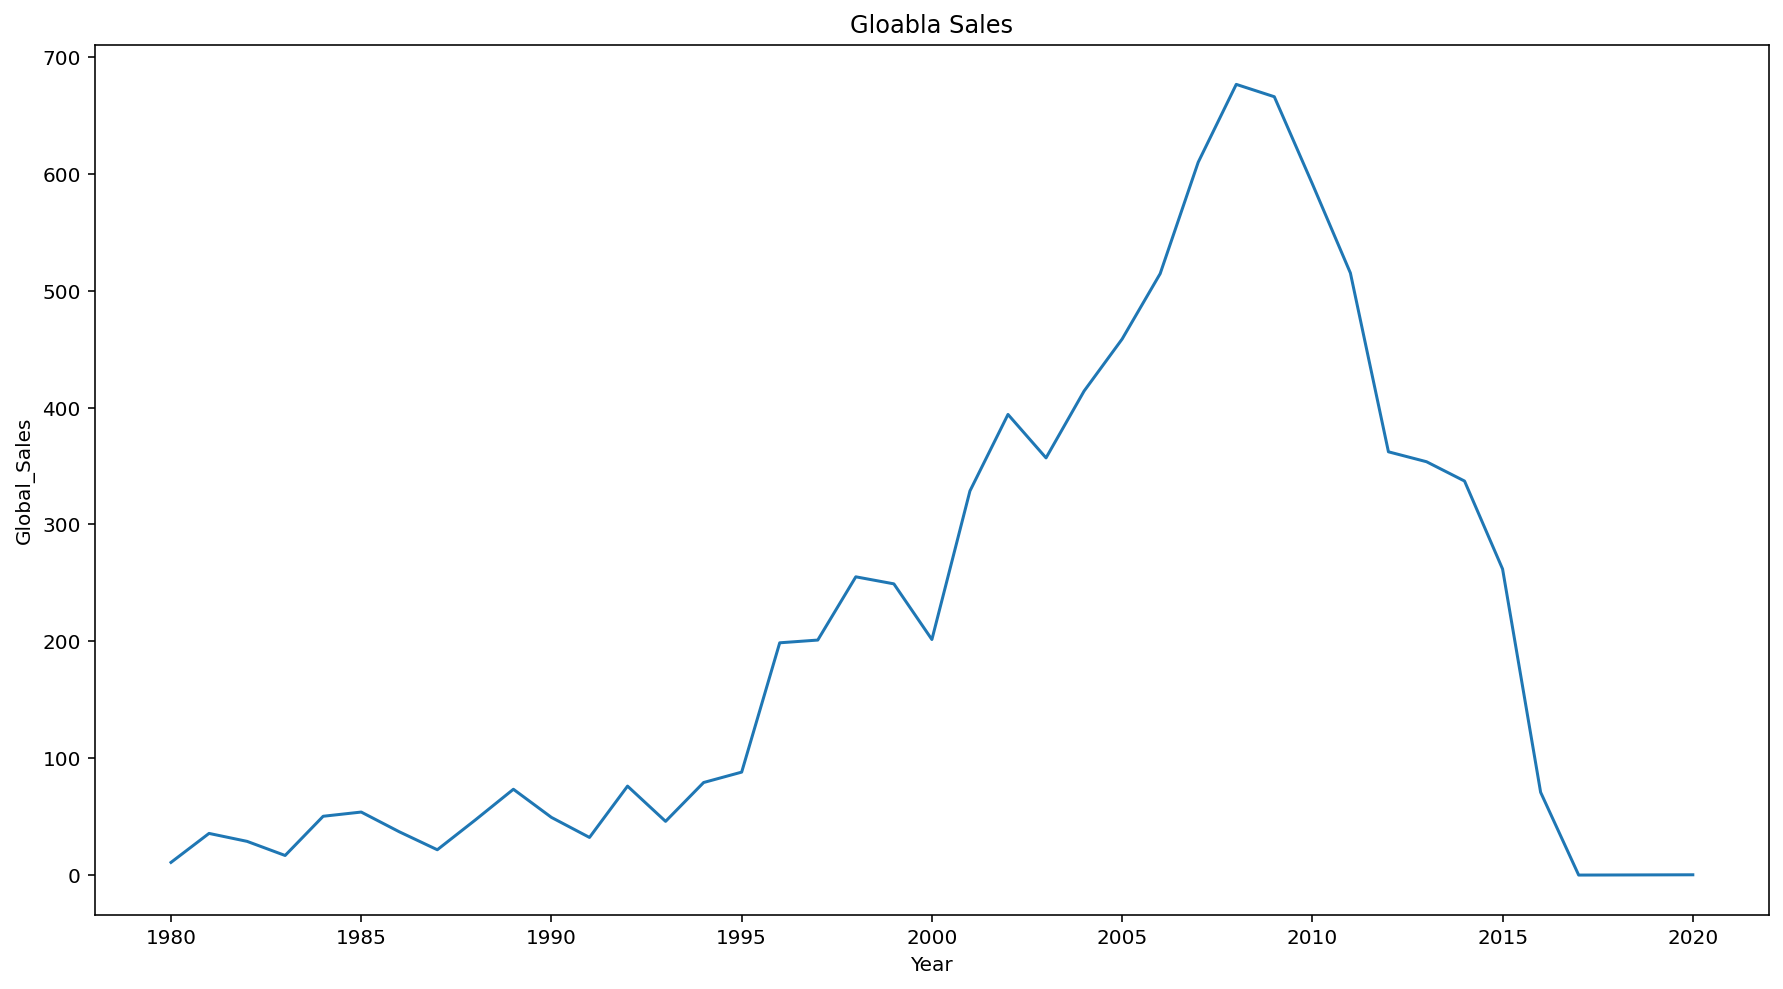

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Gloabla Sales')
sns.lineplot(data=df2_, x="Year", y="Global_Sales")
plt.show()

In [ ]:
genre_list=df['Genre'].unique()

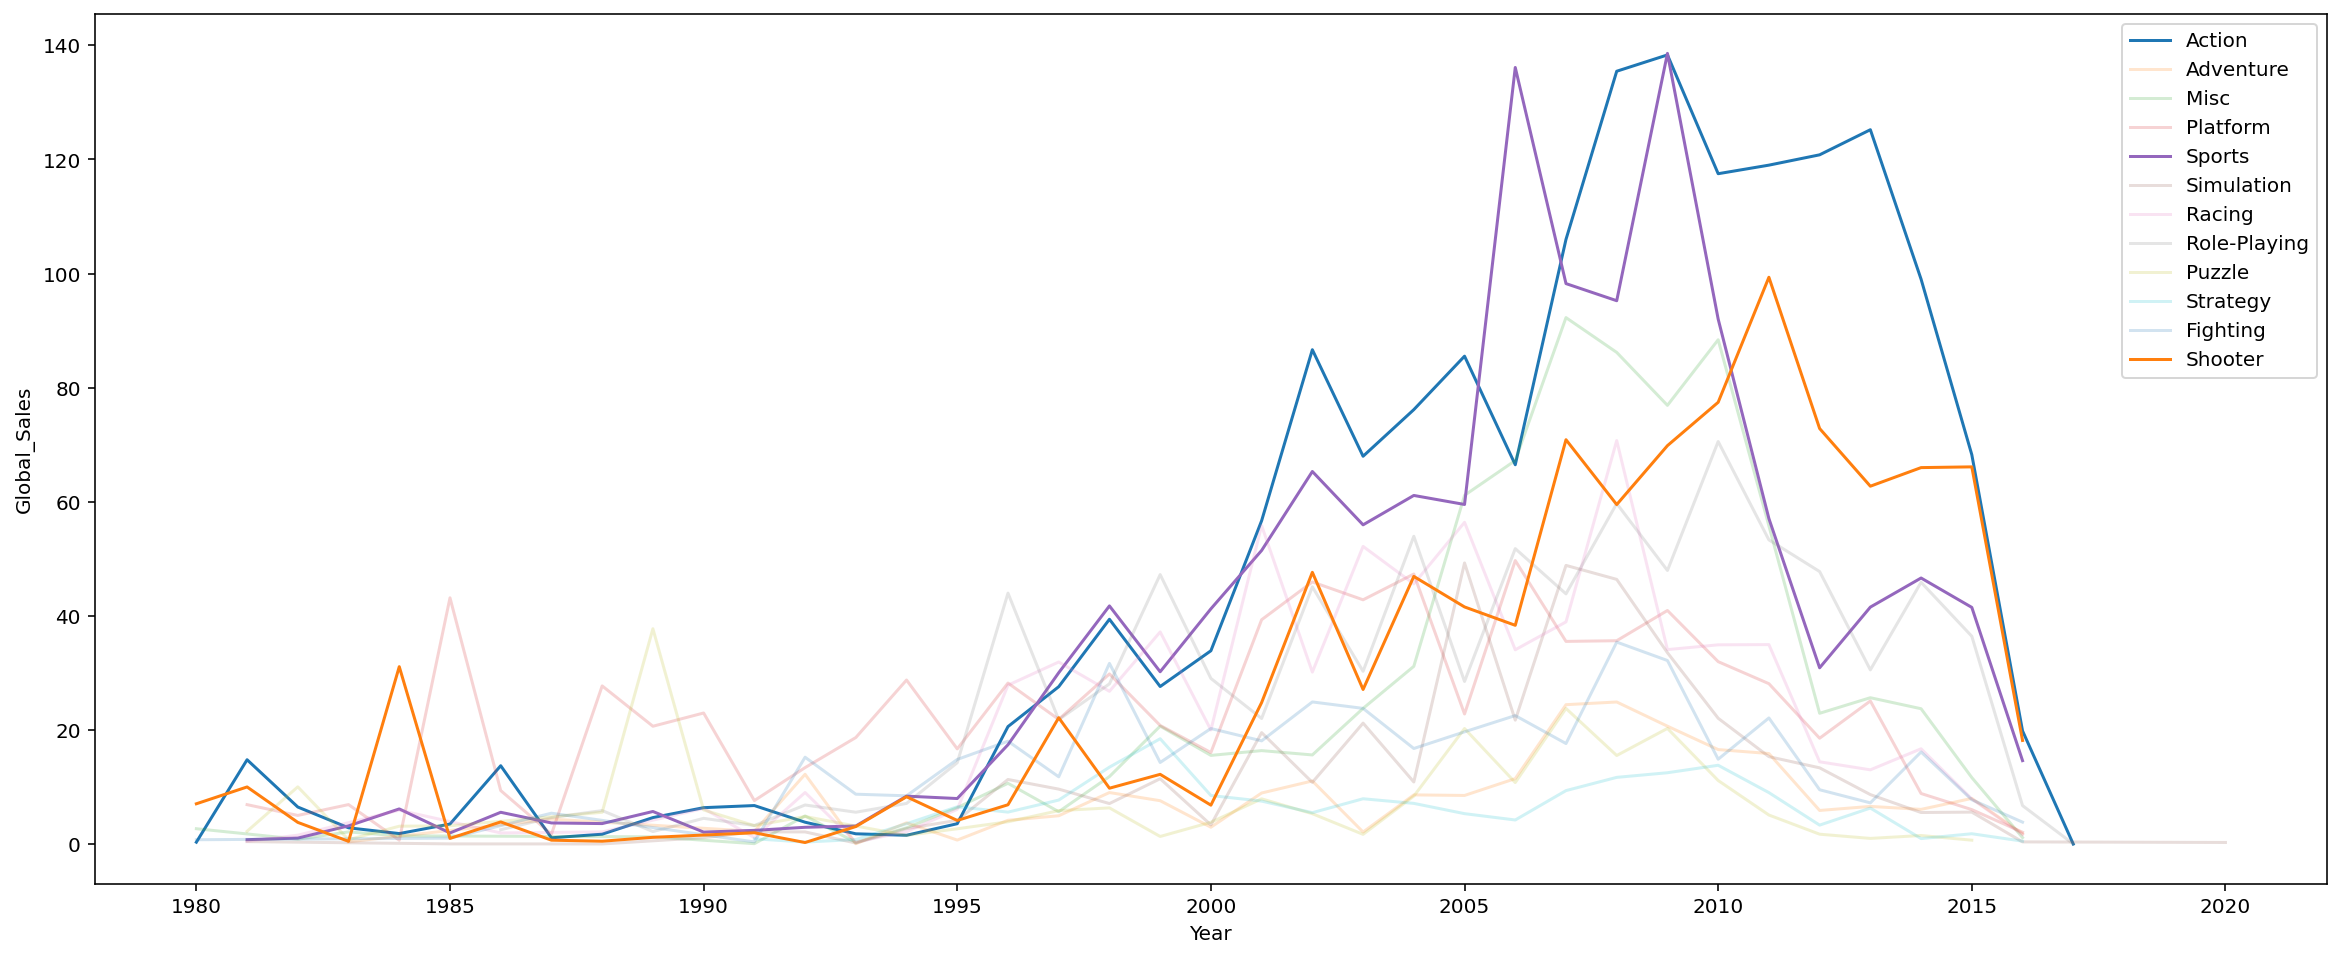

In [ ]:
plt.figure(figsize=(20,8))
for genre in genre_list:
  cond=df2['Genre']==genre
  g_sales=df2[cond].groupby('Year').sum()
  if genre=='Sports'or genre=='Action' or genre=='Shooter':
    sns.lineplot(x='Year',y='Global_Sales',data=g_sales,label=genre,alpha  = 1)
  else :
    sns.lineplot(x='Year',y='Global_Sales',data=g_sales,label=genre,alpha  = 0.2)

In [ ]:
df2=df[['Year','Genre','Global_Sales']]

In [ ]:
year_80=df2[(df2['Year']>=1980) & (df2['Year']<1990)]
year_90=df2[(df2['Year']>=1990) & (df2['Year']<2000)]
year_00=df2[(df2['Year']>=2000) & (df2['Year']<2010)]
year_10=df2[(df2['Year']>=2010) & (df2['Year']<2020)]

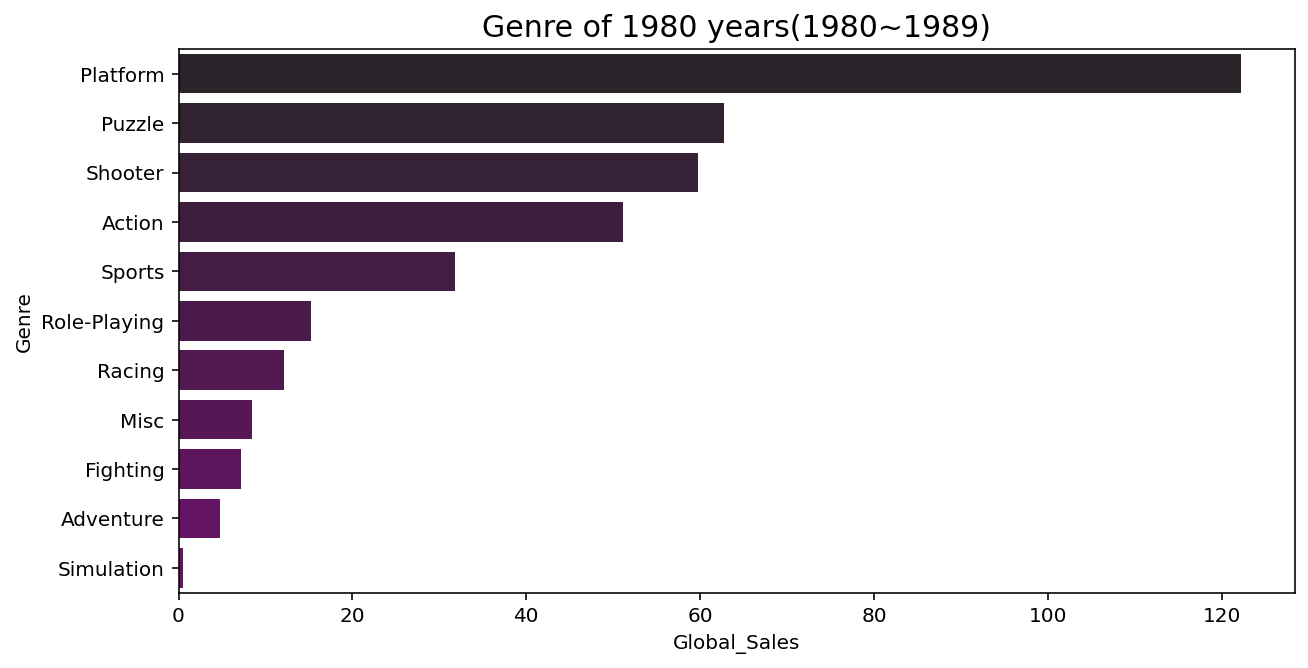

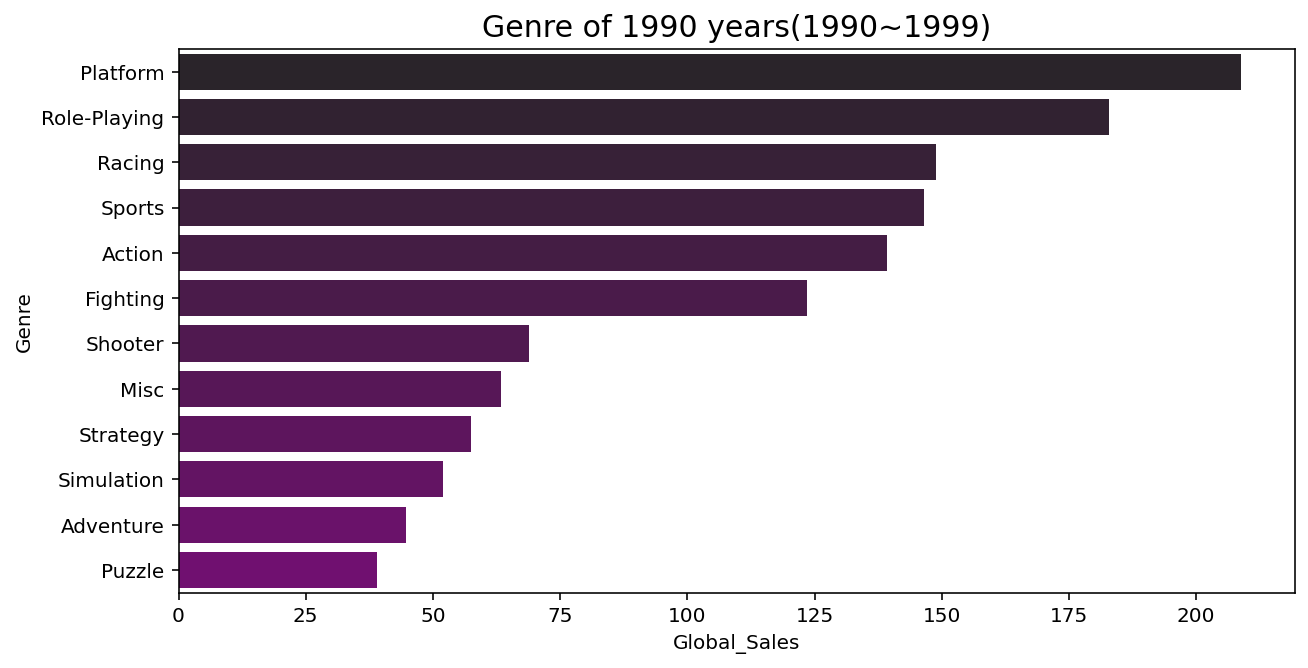

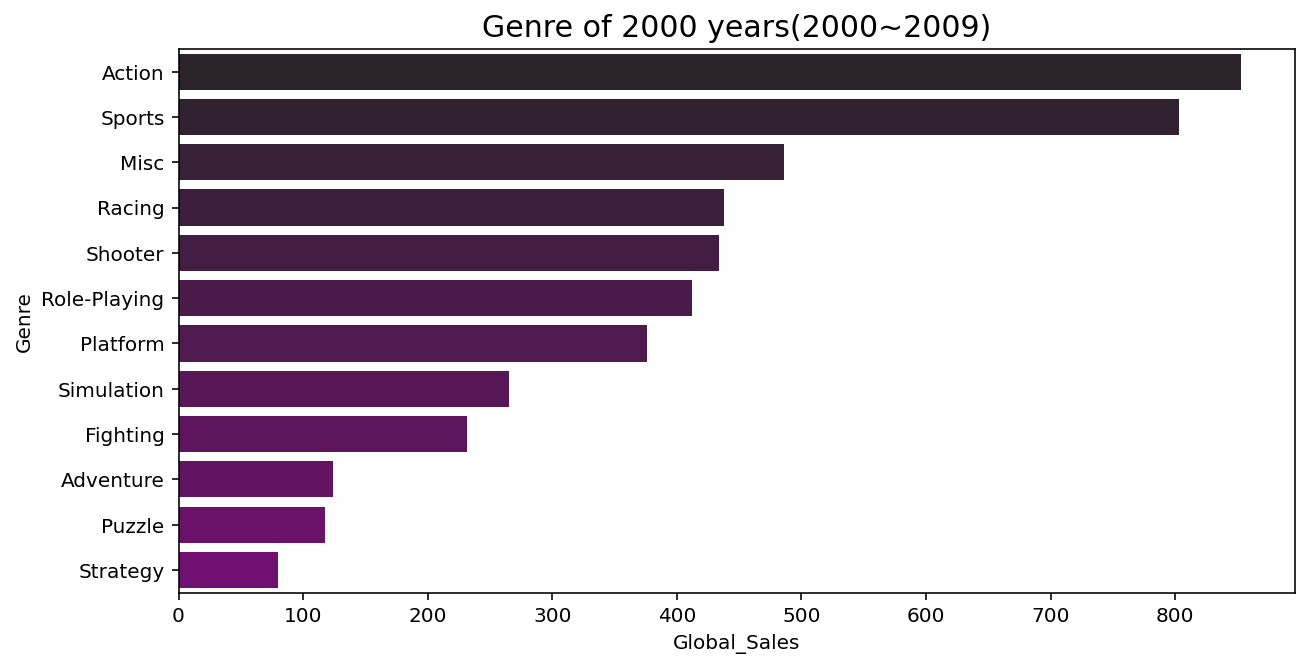

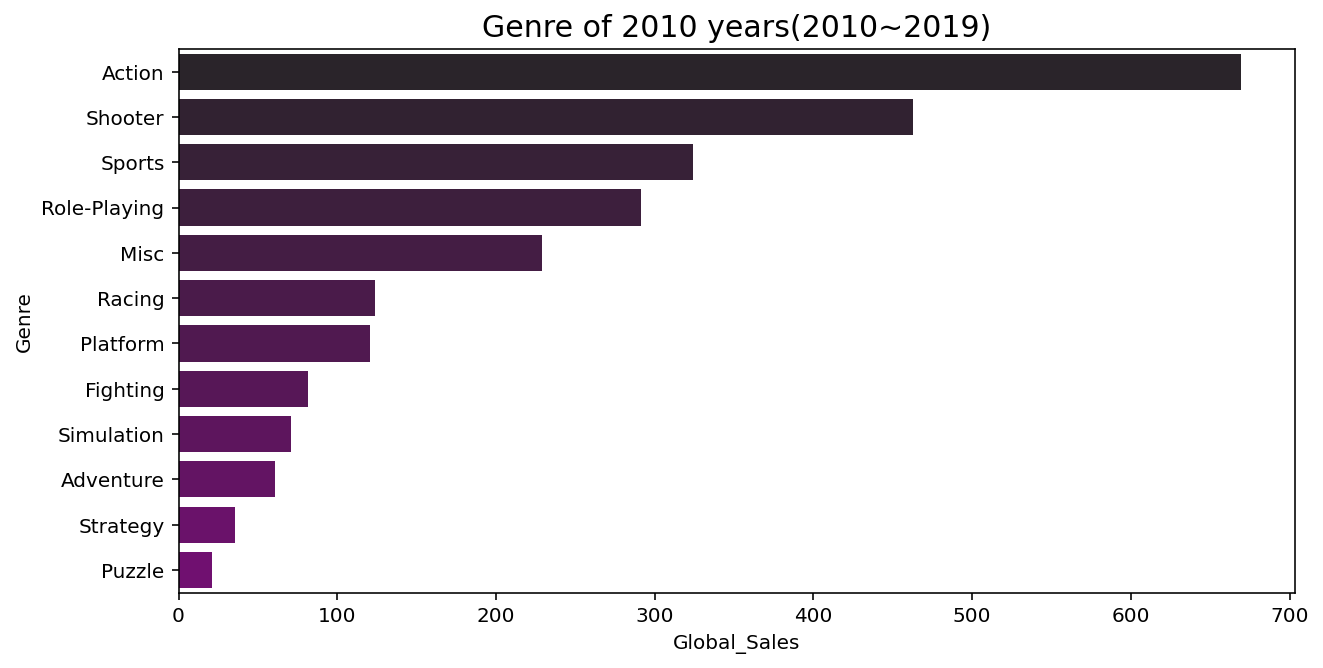

In [ ]:
def genre_year(df,years):
  df=df[['Genre','Global_Sales']]
  df=df.groupby('Genre').sum()
  df=df.sort_values(by='Global_Sales',ascending=False)
  df=df.reset_index()
  x=df['Genre']
  y=df['Global_Sales']
  plt.figure(figsize=(10,5))
  colors = sns.dark_palette("purple",12)
  ax = sns.barplot(y = x, x = y, orient='h', palette=colors)
  ax.set_title(label='Genre of '+str(years)+' years('+str(years)+'~'+str(years+9)+')', fontsize=15)
  plt.show();
genre_year(year_80,1980)
genre_year(year_90,1990)
genre_year(year_00,2000)
genre_year(year_10,2010)

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [ ]:
df3=copy.copy(df)
df3=df3.sort_values(by='Global_Sales',ascending=False)
df3=df3.reset_index().drop('index',axis=1)

### -출고량이 높은 게임의 기준?

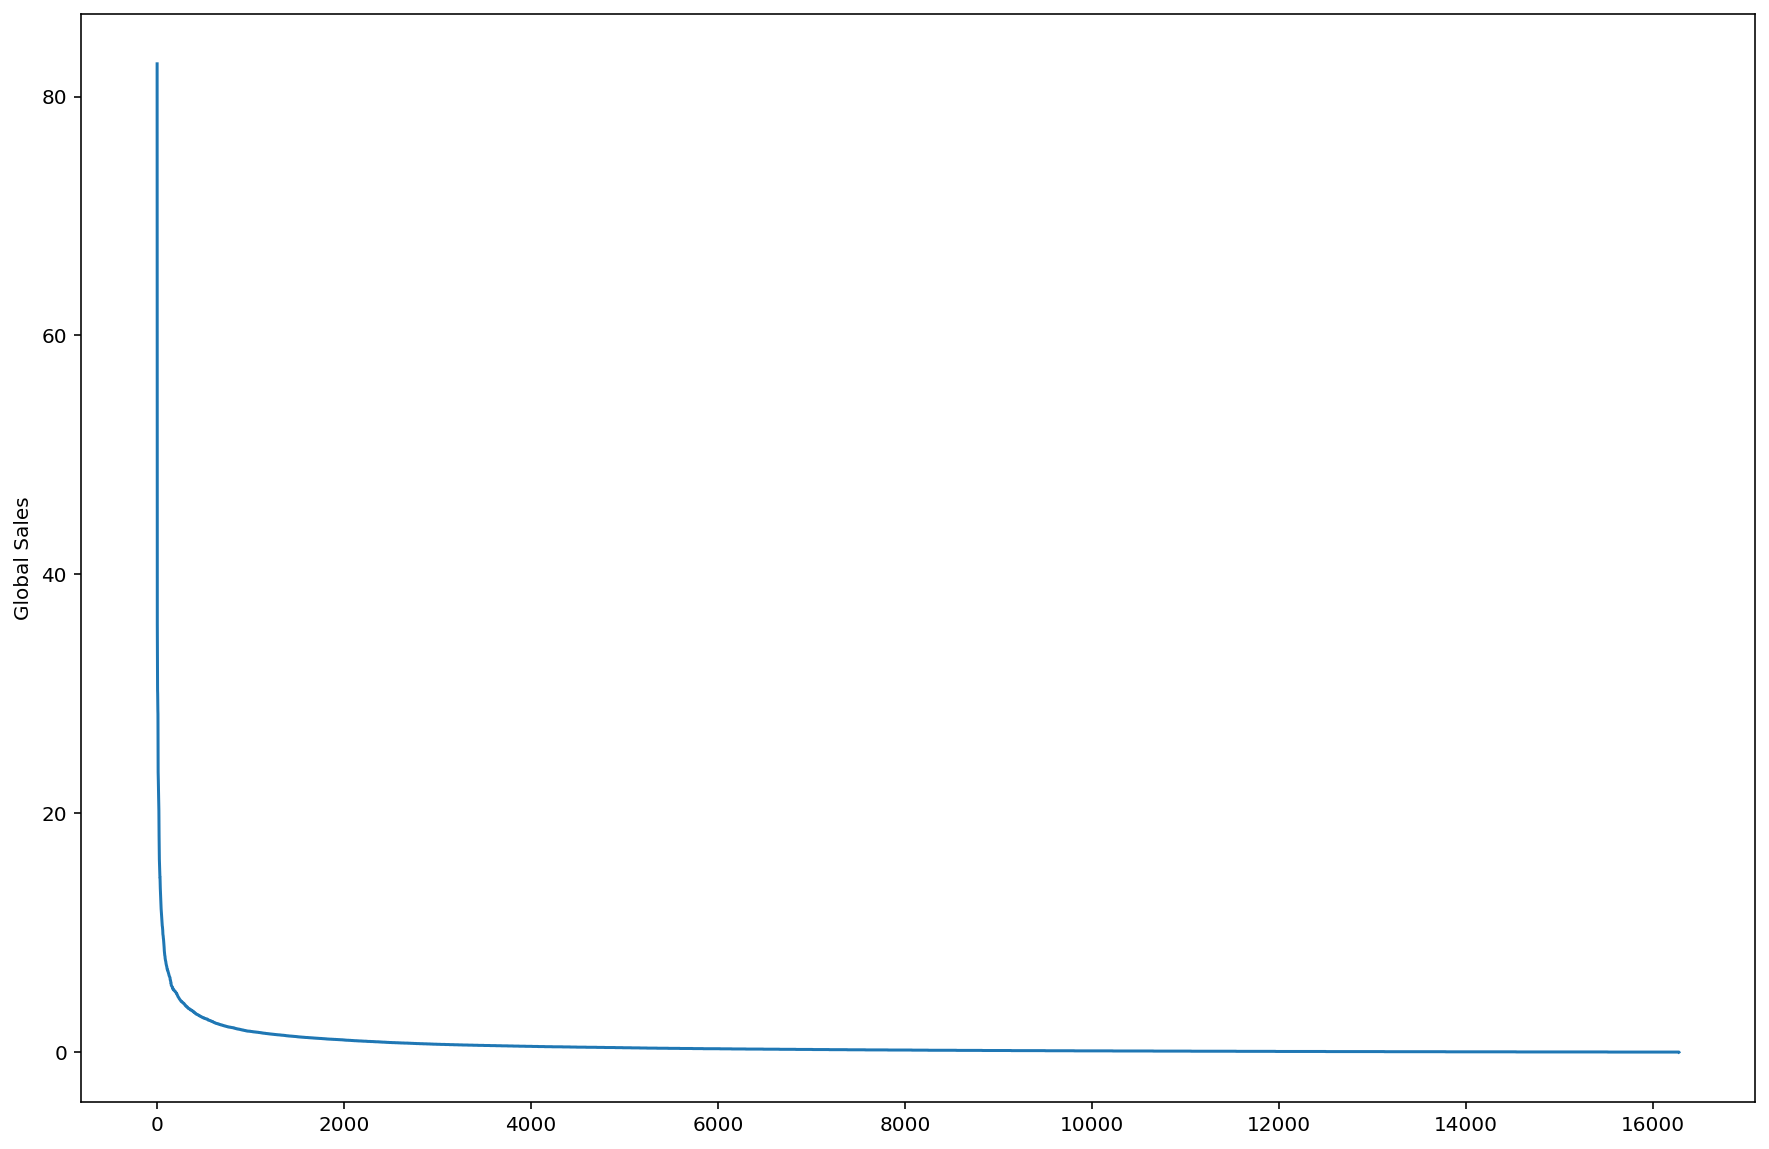

In [ ]:
# 출고량이 높은 게임순으로 그래프 출력
n=len(df3)
x=list(range(n))
y=df3['Global_Sales']
sum=y.sum()
plt.figure(figsize=(15,10))
plt.ylabel('Global Sales')
plt.plot(x,y)
plt.show()


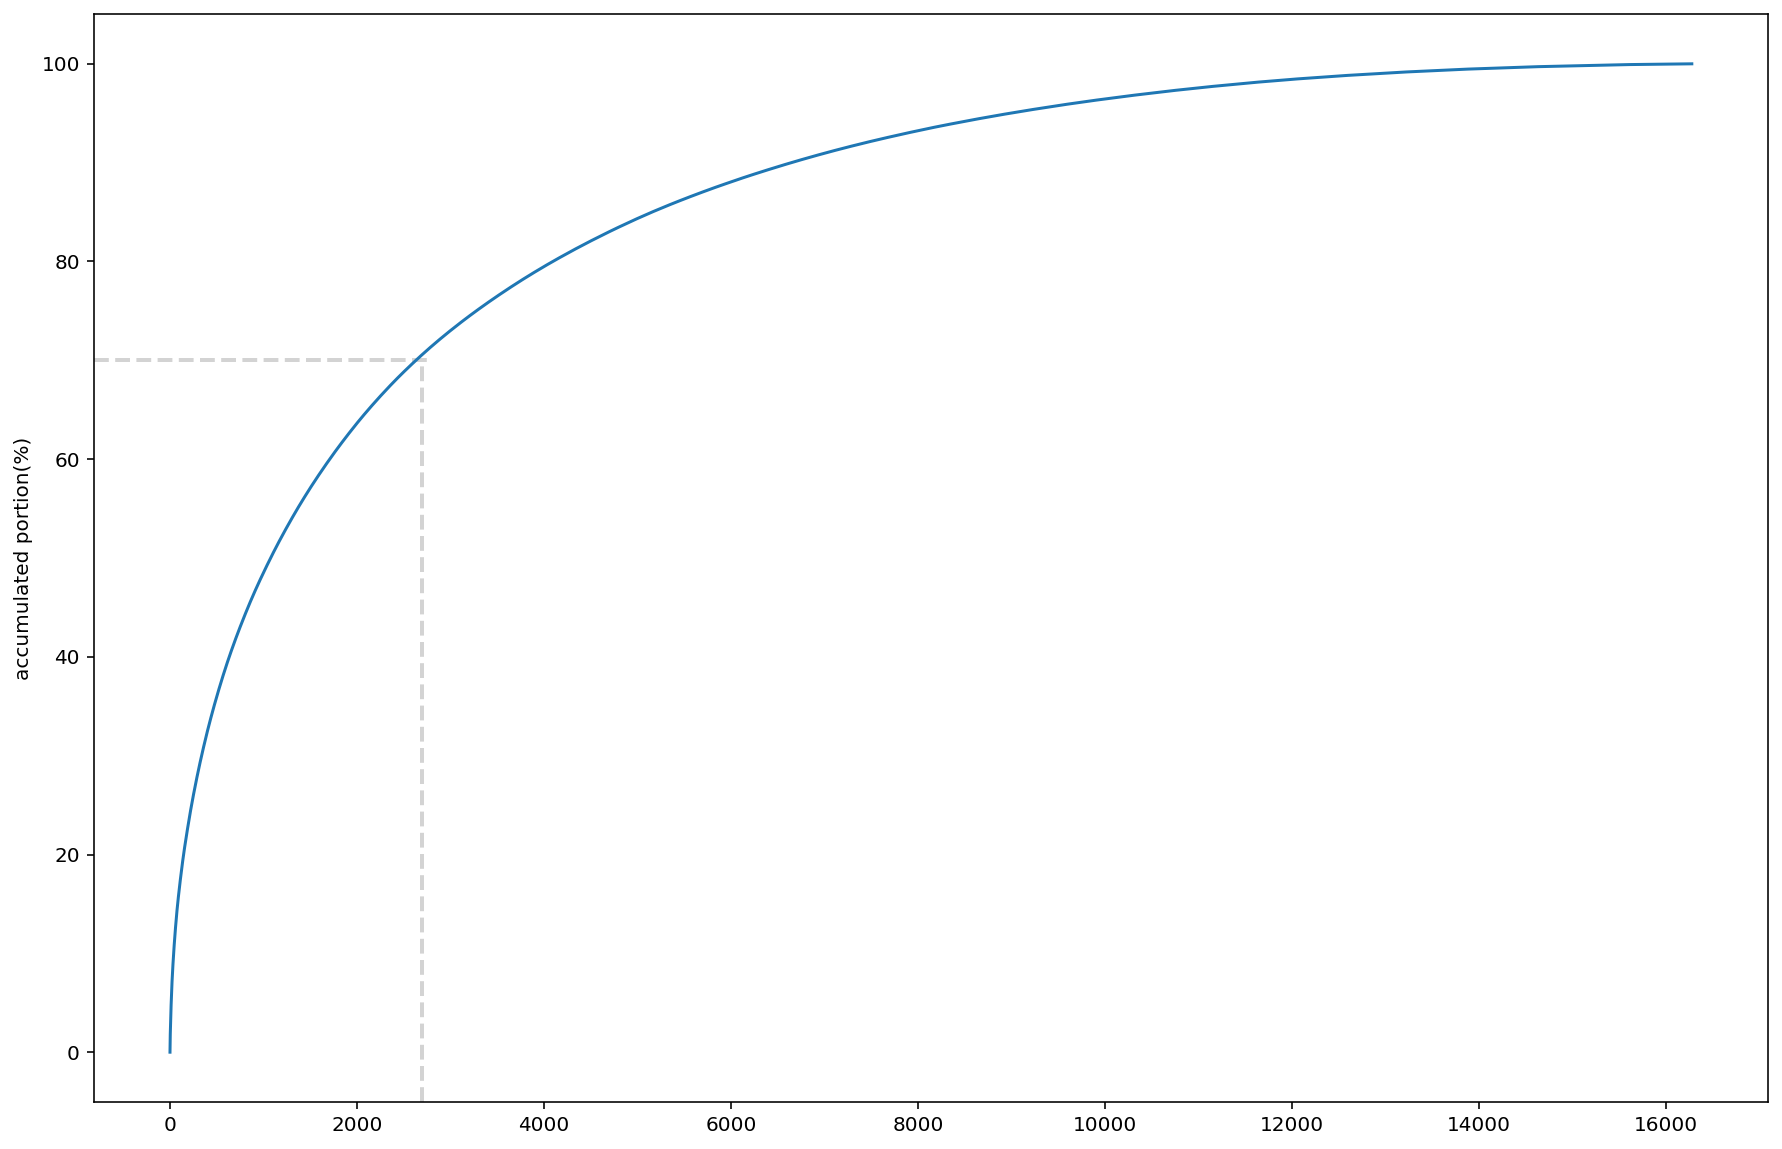

In [ ]:
# 누적 출고량 비율
x1=np.zeros(n)
y1=y/sum
for i in range(n):
  x1[i]=y1[0:i].sum()*100
plt.figure(figsize=(15,10))
plt.axhline(70, 0, 0.2, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(2700, 0, 0.68, color='lightgray', linestyle='--', linewidth=2)
plt.plot(x,x1)
plt.ylabel('accumulated portion(%)')
plt.show()  

In [ ]:
x1[2700]

70.60240468933819

In [ ]:
df3=df3.iloc[0:2700,:]
cond=df3['Year']>=2010
df3=df3[cond]

In [ ]:
df3_p=df3[['Platform','Global_Sales']].groupby(by='Platform').sum().sort_values(by='Global_Sales',ascending=False).reset_index()
df3_g=df3[['Genre','Global_Sales']].groupby(by='Genre').sum().sort_values(by='Global_Sales',ascending=False).reset_index()
na=df3['NA_Sales'].sum()
eu=df3['EU_Sales'].sum()
jp=df3['JP_Sales'].sum()
ot=df3['Other_Sales'].sum()

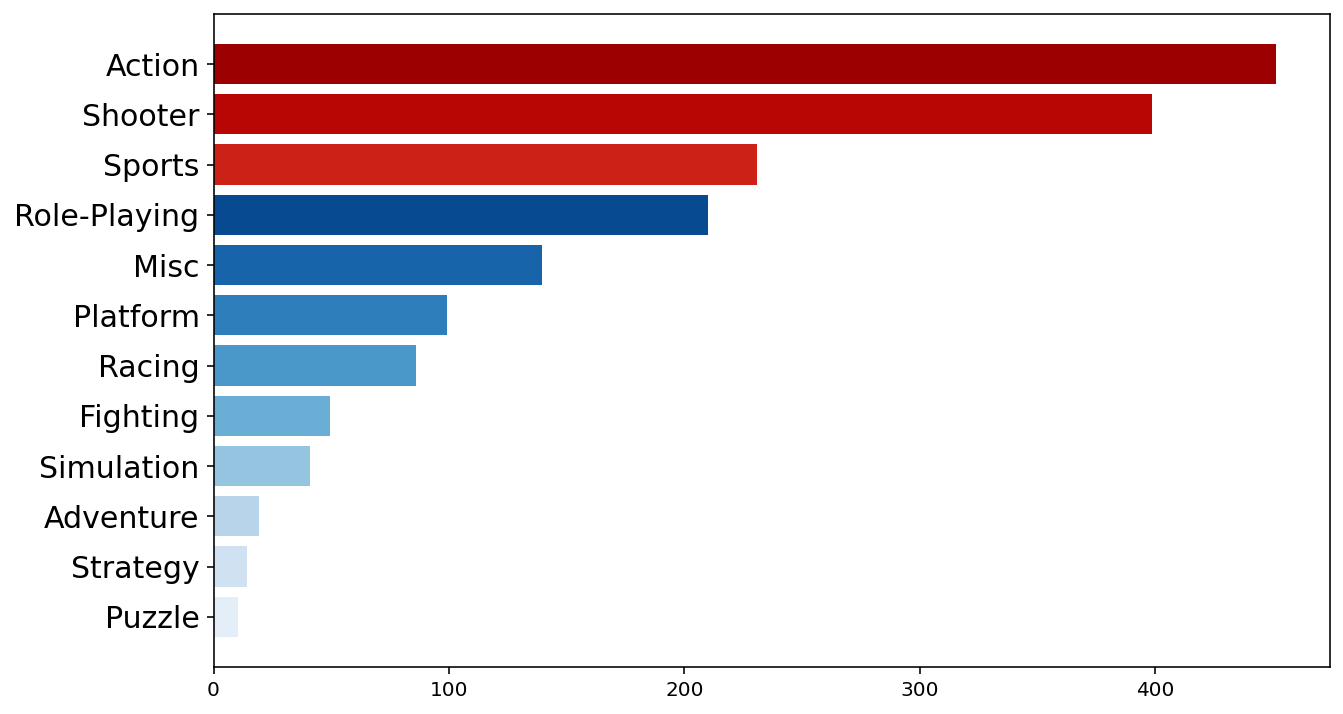

In [ ]:
blue = sns.color_palette('Blues',9)
red = sns.color_palette('OrRd',13)
red=red[::-1]
red=red[0:3]
red=red[::-1]
colors=blue+red
df3_gg=df3_g[::-1]
plt.figure(figsize=(10,6))
plt.yticks(fontsize=15)
plt.barh(df3_gg['Genre'],df3_gg['Global_Sales'],color=colors)
plt.show()

In [ ]:
df3_p['pf']=0
for i in range (12):
  if (df3_p['Platform'][i]=='PS3') or (df3_p['Platform'][i]=='PS4') or (df3_p['Platform'][i]=='PSV') or (df3_p['Platform'][i]=='PSP') or (df3_p['Platform'][i]=='PS2'):
    df3_p['pf'][i]='PS'

  elif (df3_p['Platform'][i]=='3DS') or (df3_p['Platform'][i]=='Wii') or (df3_p['Platform'][i]=='DS') or (df3_p['Platform'][i]=='WiiU'):
    df3_p['pf'][i]='Nintendo'

  elif (df3_p['Platform'][i]=='X360') or (df3_p['Platform'][i]=='XOne'):
    df3_p['pf'][i]='Xbox'
  
  else:
    df3_p['pf'][i]='PC'


In [ ]:
df3_p

,Platform,Global_Sales,pf
0,PS3,451.46,PS
1,X360,447.02,Xbox
2,PS4,229.96,PS
3,3DS,160.94,Nintendo
4,Wii,145.32,Nintendo
5,XOne,106.48,Xbox
6,DS,61.12,Nintendo
7,PC,60.57,PC
8,WiiU,55.58,Nintendo
9,PSV,17.12,PS


In [ ]:
fig = px.sunburst(df3_p, path=["pf", "Platform"], values='Global_Sales')
fig.show()

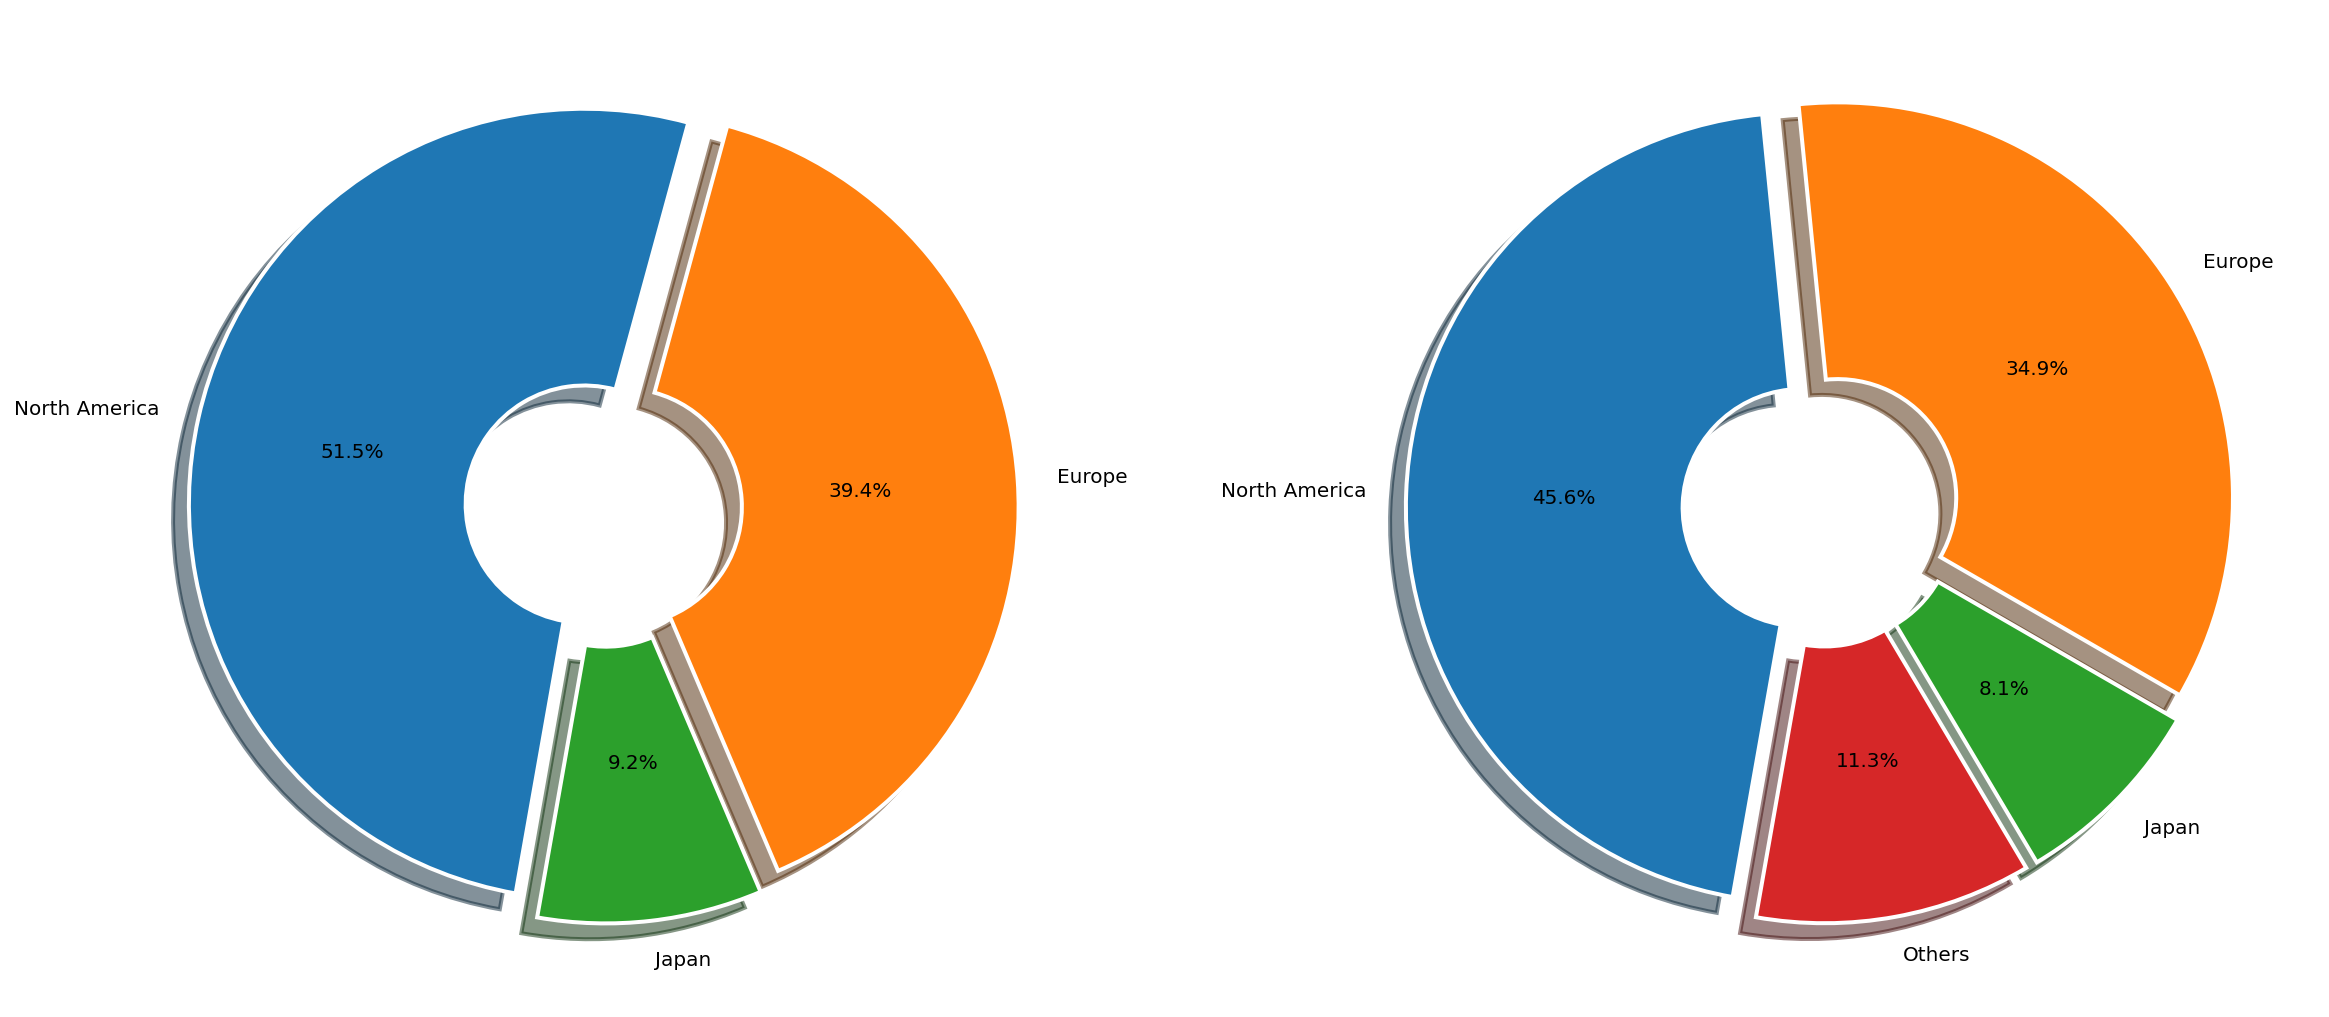

In [ ]:
ratio1=[na,eu,jp]
ratio2=[na,eu,jp,ot]

explode1 = [0.05, 0.05, 0.05]
explode2 = [0.05, 0.05, 0.05, 0.05]

label1 =['North America','Europe','Japan']
label2 =['North America','Europe','Japan','Others']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.pie(ratio1, labels=label1, autopct='%.1f%%', startangle=260, counterclock=False,explode=explode1,shadow=True,wedgeprops=wedgeprops)
plt.subplot(2,2,2)
plt.pie(ratio2, labels=label2, autopct='%.1f%%', startangle=260, counterclock=False,explode=explode2,shadow=True,wedgeprops=wedgeprops)
plt.show()

*  장르 : Action / Sports / Shooter 
*  플랫폼 : PS / Xbox 
*  지역 : 북미 / 유럽



